# Project For  Car Price prediction using ML Model 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings


warnings.filterwarnings("ignore")


warnings.filterwarnings("ignore", category=FutureWarning)


# 1.Problem Definition  >> Car Price prediction using features 

# 2. Data Gathering

In [3]:
df=pd.read_csv('OLX_cars_dataset.csv',usecols=['Make','Year','KM\'s driven','Price','Fuel','Assembly','Transmission'])
df

,Make,Year,KM's driven,Price,Fuel,Assembly,Transmission
0,Changan,2022,8500,4200000,Petrol,Local,Automatic
1,Changan,2022,2200,4100000,Petrol,Local,Automatic
2,Changan,2021,17000,3950000,Petrol,Local,Automatic
3,Changan,2022,15000,3785000,Petrol,Local,Manual
4,Changan,2022,27000,4075000,Petrol,Local,Automatic
...,...,...,...,...,...,...,...
8716,Toyota,2020,54000,4500000,Petrol,Local,Automatic
8717,Toyota,2021,18500,4050000,Petrol,Local,Manual
8718,Toyota,2022,12000,4700000,Petrol,Local,Automatic
8719,Toyota,2020,55000,3900000,Petrol,Local,Automatic


In [4]:
df2=pd.read_csv('OLX_cars_dataset.csv',usecols=['Year','KM\'s driven','Price'])
df2

,Year,KM's driven,Price
0,2022,8500,4200000
1,2022,2200,4100000
2,2021,17000,3950000
3,2022,15000,3785000
4,2022,27000,4075000
...,...,...,...
8716,2020,54000,4500000
8717,2021,18500,4050000
8718,2022,12000,4700000
8719,2020,55000,3900000


#### Find the shape of data


In [5]:
df.shape

(8721, 7)

#### Find the missing values in data

In [6]:
df.isnull().sum()

Make            0
Year            0
KM's driven     0
Price           0
Fuel            0
Assembly        0
Transmission    0
dtype: int64

#### Find the datatypes of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          8721 non-null   object
 1   Year          8721 non-null   int64 
 2   KM's driven   8721 non-null   int64 
 3   Price         8721 non-null   int64 
 4   Fuel          8721 non-null   object
 5   Assembly      8721 non-null   object
 6   Transmission  8721 non-null   object
dtypes: int64(3), object(4)
memory usage: 477.1+ KB


#### Check 5 point Summary for numerical columns

In [8]:
df.describe()

,Year,KM's driven,Price
count,8721.000000,8721.000000,8.721000e+03
mean,2012.671712,95348.594198,2.097328e+06
std,5.912057,61550.623242,1.157404e+06
min,1989.000000,1.000000,1.850000e+05
25%,2007.000000,52000.000000,1.150000e+06
50%,2013.000000,90000.000000,1.900000e+06
75%,2018.000000,124000.000000,2.820000e+06
max,2024.000000,533528.000000,5.000000e+06


#### Check correlation 

<AxesSubplot:>

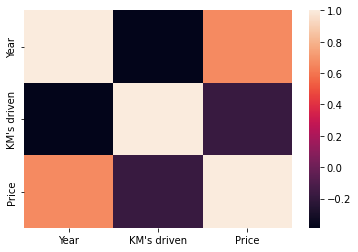

In [9]:
sns.heatmap(df.corr())

# 3. Exploratory Data Anlaysis

## 3.1 Univariate Analysis

27

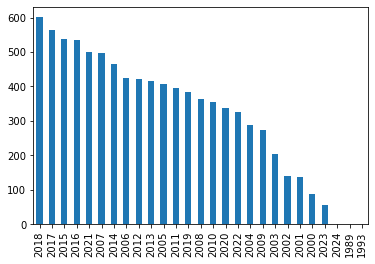

In [10]:
df['Year'].value_counts().plot(kind='bar')
df['Year'].nunique()

AxesSubplot(0.125,0.125;0.775x0.755)


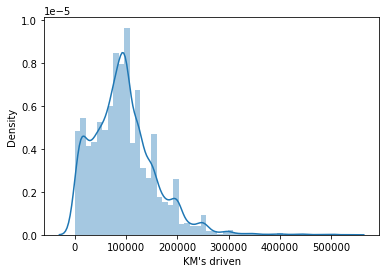

In [11]:
print(sns.distplot(df['KM\'s driven']))


AxesSubplot(0.125,0.125;0.775x0.755)


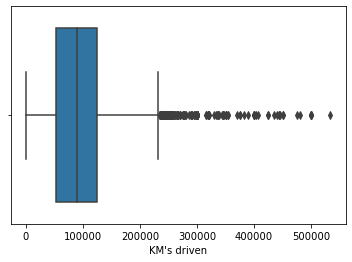

In [12]:
print(sns.boxplot(df['KM\'s driven']))
# There are alot of ouliers in this columns .
# we can remove them during feature engineering

AxesSubplot(0.125,0.125;0.775x0.755)


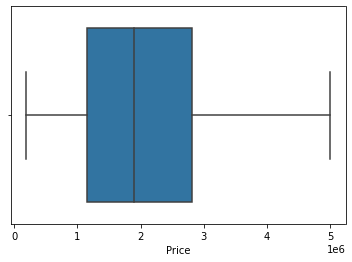

In [13]:
print(sns.boxplot(df['Price']))

In [14]:
### Categorical values

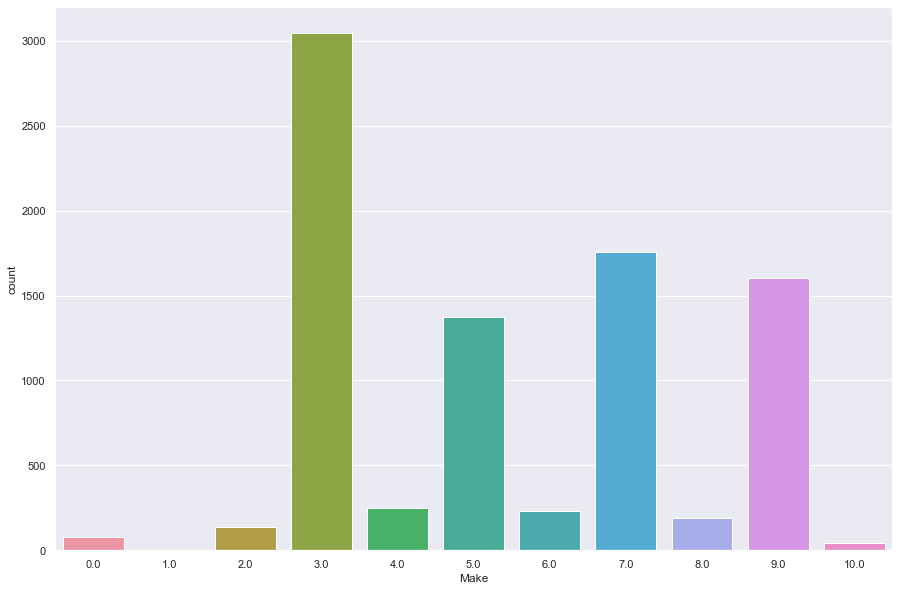

In [74]:
sns.countplot(df['Make'])
sns.set(rc={'figure.figsize':(20,15)})

3.0    8540
2.0     179
0.0       1
1.0       1
Name: Fuel, dtype: int64


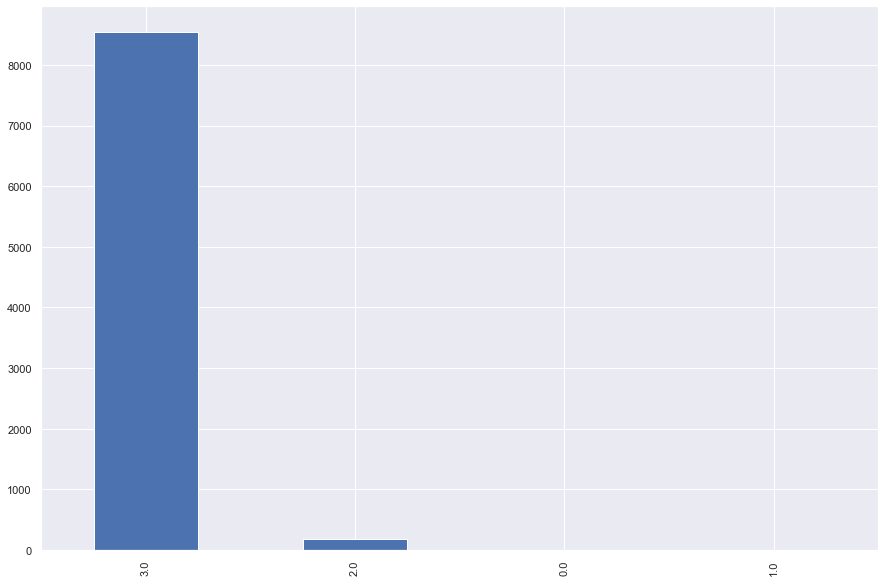

In [76]:
df['Fuel'].value_counts().plot(kind='bar')
print(df['Fuel'].value_counts())
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:xlabel='Assembly', ylabel='count'>

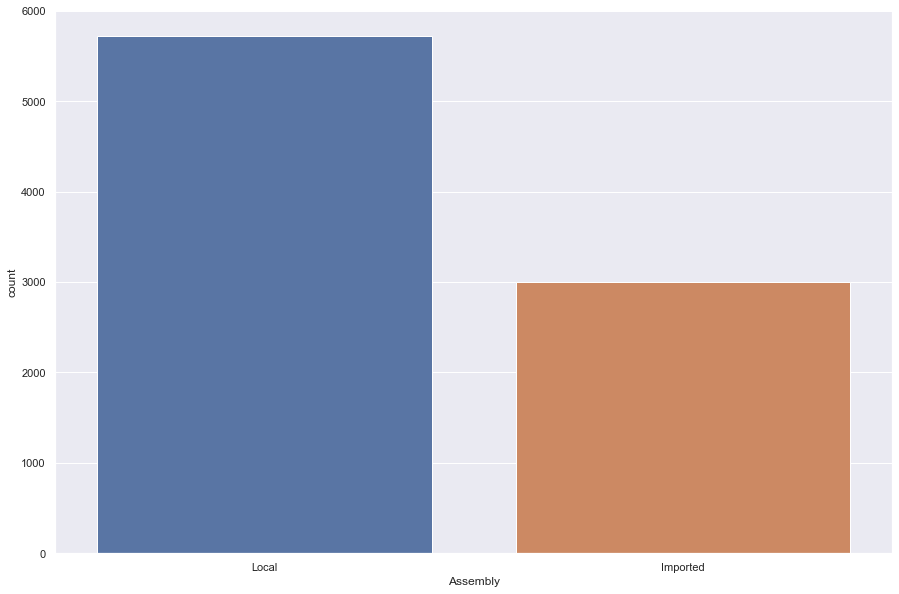

In [17]:
sns.countplot(df['Assembly'])

<AxesSubplot:xlabel='Transmission', ylabel='count'>

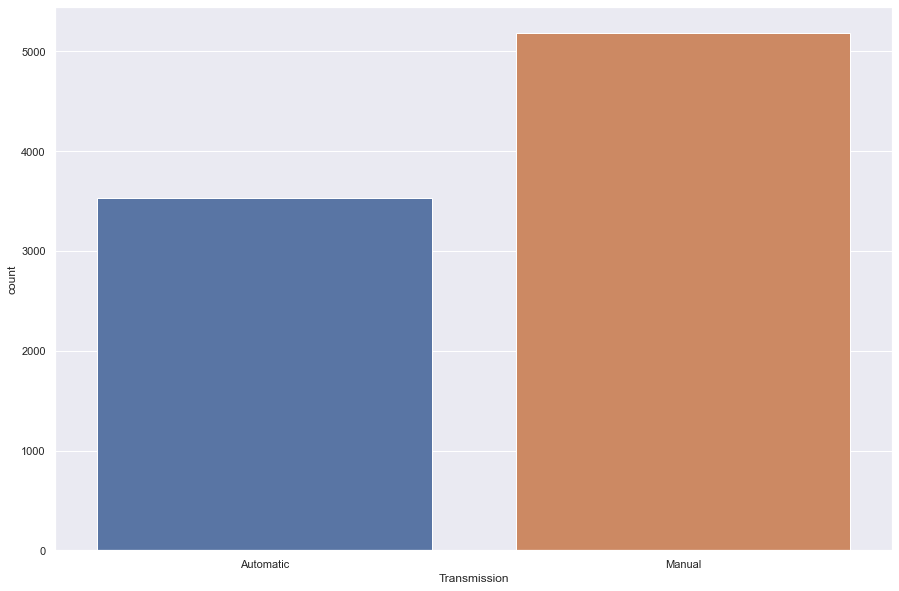

In [18]:
sns.countplot(df['Transmission'])

## 3.2 Bivariate Analysis

<AxesSubplot:xlabel="KM's driven", ylabel='Price'>

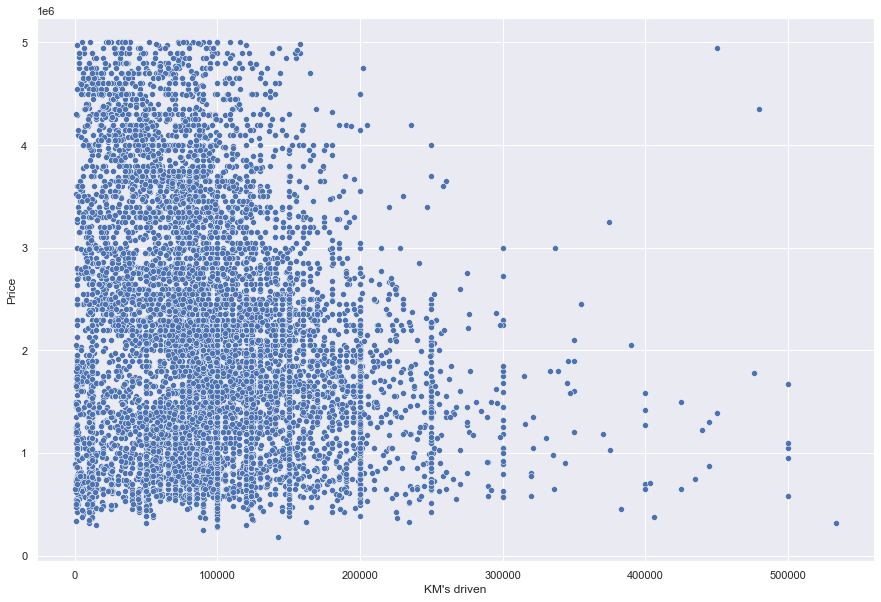

In [19]:
sns.scatterplot(df['KM\'s driven'],df['Price'])

# higher the KM driven by car, lower is price

<AxesSubplot:xlabel='Year', ylabel='Price'>

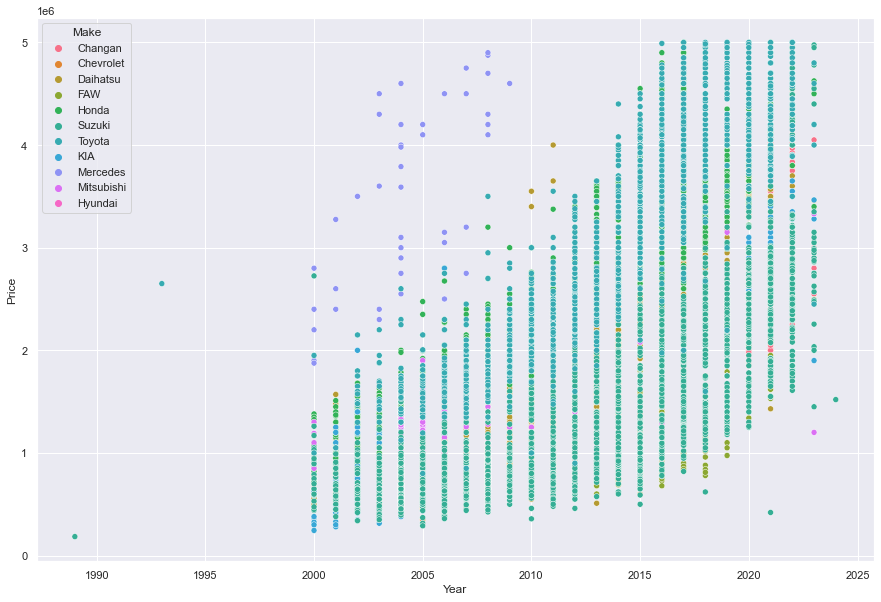

In [20]:
sns.scatterplot(df['Year'],df['Price'],hue=df['Make'])

# Latest Cars are expensive while old cars are not costly due to depreciation

<AxesSubplot:xlabel="KM's driven", ylabel='Price'>

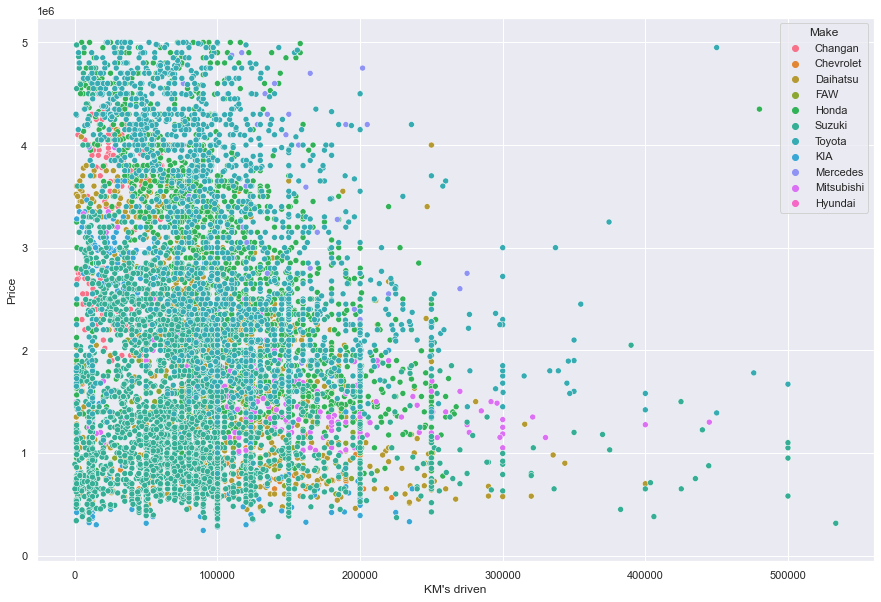

In [21]:
sns.scatterplot(df['KM\'s driven'],df['Price'],hue=df['Make'])

<AxesSubplot:xlabel="KM's driven", ylabel='Price'>

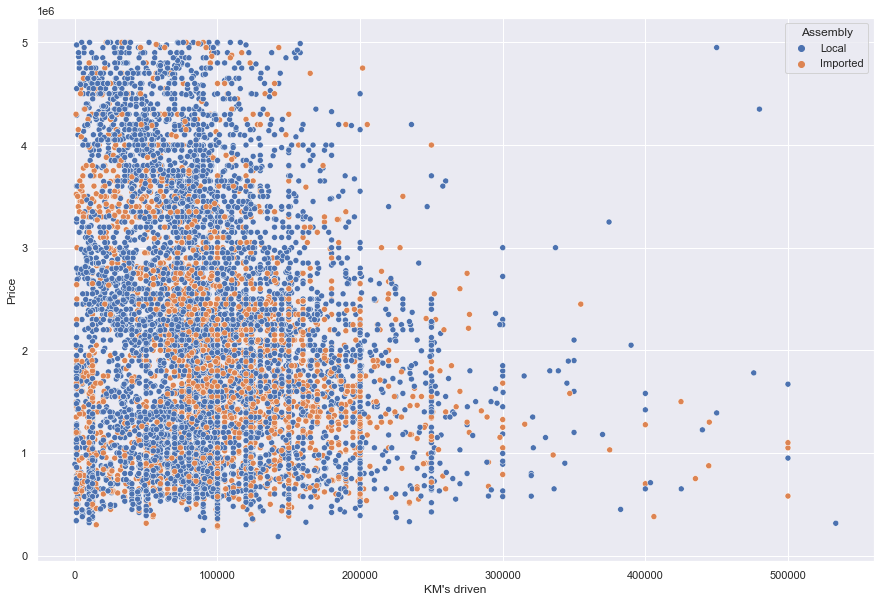

In [22]:
sns.scatterplot(df['KM\'s driven'],df['Price'],hue=df['Assembly'])

<AxesSubplot:xlabel="KM's driven", ylabel='Price'>

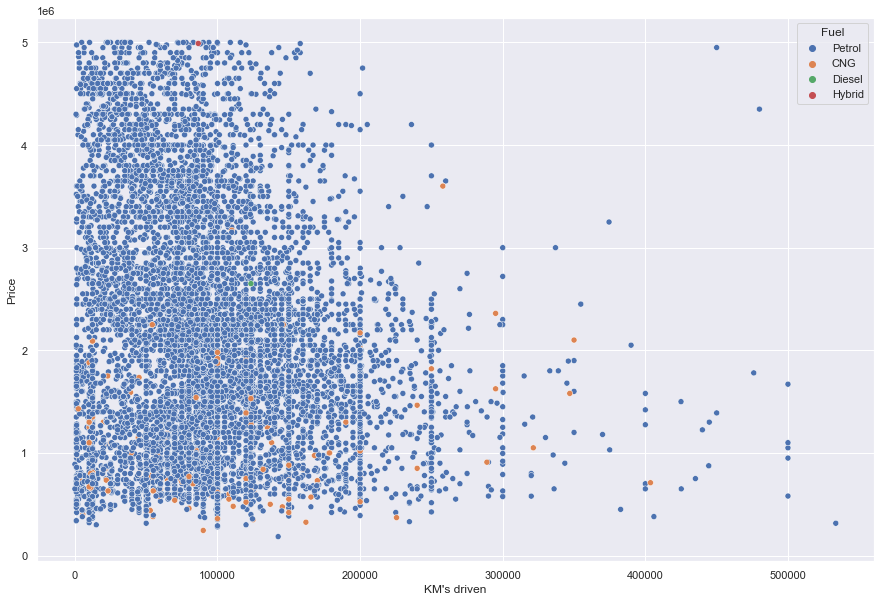

In [23]:
sns.scatterplot(df['KM\'s driven'],df['Price'],hue=df['Fuel'])

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

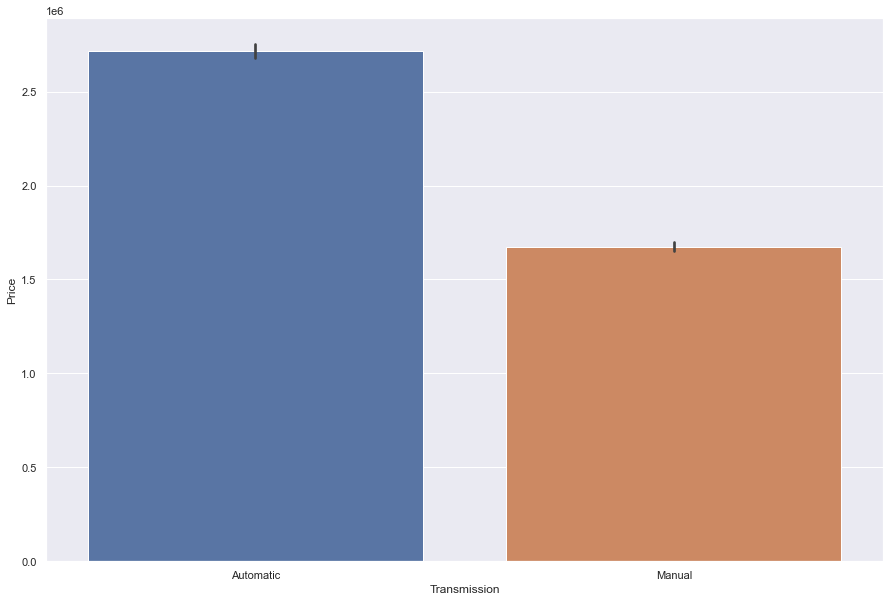

In [24]:
sns.barplot(df['Transmission'],df['Price'])

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

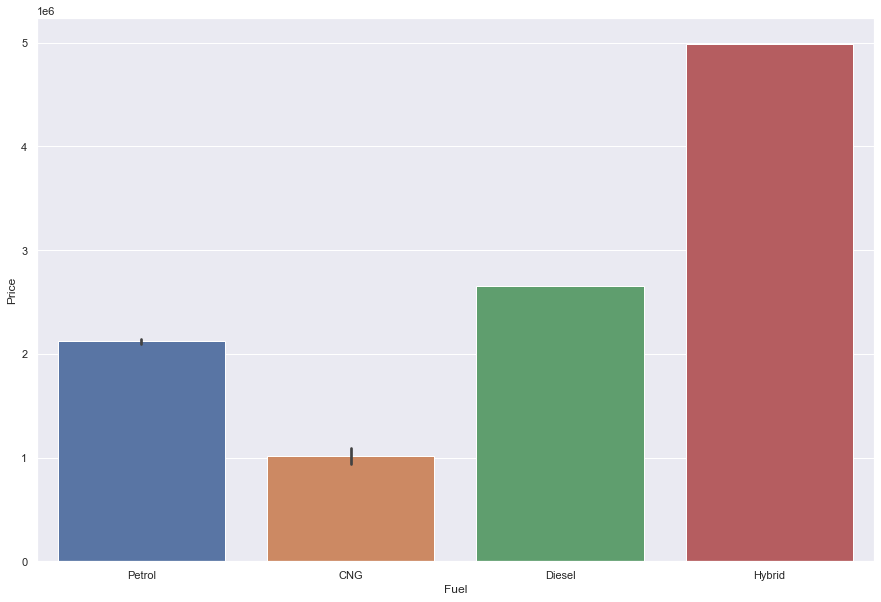

In [25]:
sns.barplot(df['Fuel'],df['Price'])

<AxesSubplot:xlabel='Make', ylabel='Price'>

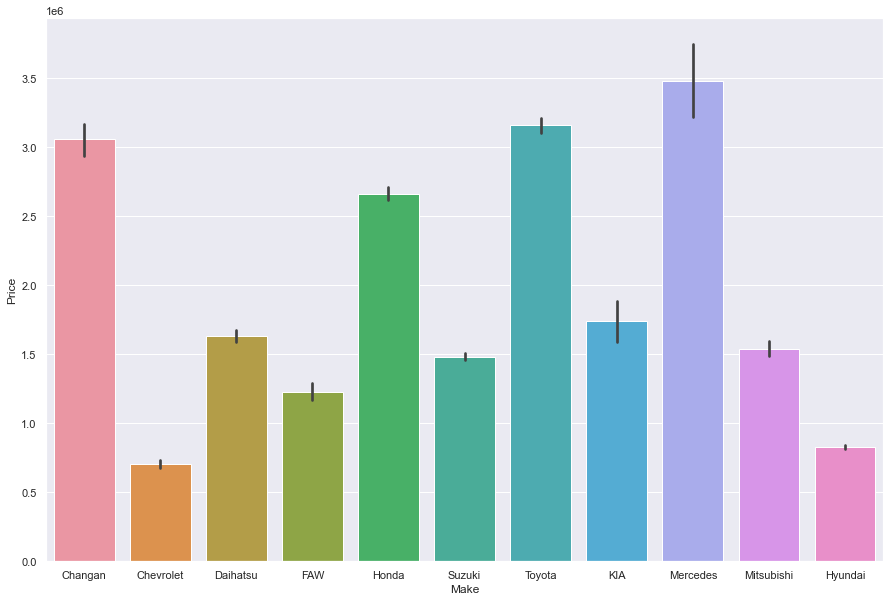

In [26]:
sns.barplot(df['Make'],df['Price'])

<AxesSubplot:xlabel='Assembly', ylabel='Price'>

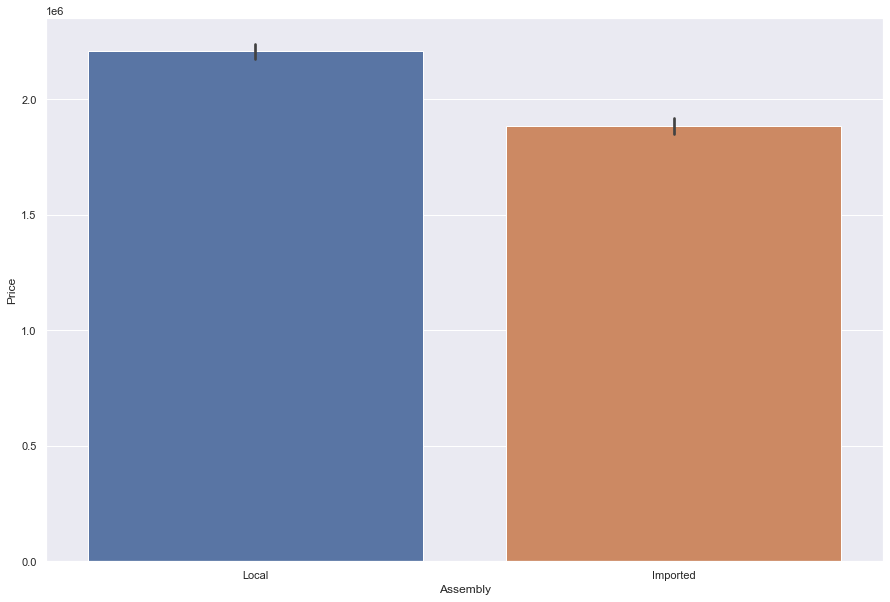

In [27]:
sns.barplot(df['Assembly'],df['Price'])

# 4 Feature Engineering

## 4.1 Encoding Categorical Value

### 4.1.1 Order of 'Make' Feature

In [28]:
for i in df['Make'].unique():
    model=df[df['Make']==i]
    print(i)
    print(model['Price'].mean())

Changan
3062677.0833333335
Chevrolet
707831.1558441558
Daihatsu
1633646.0284049527
FAW
1227284.6642335767
Honda
2664465.2417519907
Suzuki
1483744.5836614172
Toyota
3164000.4626400997
KIA
1738465.811965812
Mercedes
3480755.5555555555
Mitsubishi
1542429.718875502
Hyundai
828000.0


## from above we have order

In [29]:
make_order=['Chevrolet','Hyundai','FAW','Suzuki','Mitsubishi','Daihatsu','KIA','Honda','Changan','Toyota','Mercedes']
make_order

['Chevrolet',
 'Hyundai',
 'FAW',
 'Suzuki',
 'Mitsubishi',
 'Daihatsu',
 'KIA',
 'Honda',
 'Changan',
 'Toyota',
 'Mercedes']

### 4.1.2 Order for Fuel feature

In [30]:
for i in df['Fuel'].unique():
    model=df[df['Fuel']==i]
    print(i)
    print(model['Price'].mean())


Petrol
2119674.7217798596
CNG
1011916.2011173185
Diesel
2650000.0
Hybrid
4990000.0


In [31]:
fuel_orders=['Petrol','CNG','Hybrid','Diesel']

### 4.1.3  order for Assembly featute

In [32]:
for i in df['Assembly'].unique():
    model=df[df['Assembly']==i]
    print(i)
    print(model['Price'].mean())

Local
2208748.1026894865
Imported
1884308.3432387311


In [33]:
assembly_order=['Local','Imported']

### 4.1.4 order for transmission column

In [34]:
for i in df['Transmission'].unique():
    model=df[df['Transmission']==i]
    print(i)
    print(model['Price'].mean())

Automatic
2717707.740373726
Manual
1675053.2636346116


In [35]:
transmission_order=['Automatic','Manual']

In [36]:
fuel_orders=['Petrol','CNG','Hybrid','Diesel']
assembly_order=['Local','Imported']
transmission_order=['Automatic','Manual']
make_order=['Chevrolet','Hyundai','FAW','Suzuki','Mitsubishi','Daihatsu','KIA','Honda','Changan','Toyota','Mercedes']




## encoding of features having ordinal categorical value

In [37]:
new_df=pd.read_csv('OLX_cars_dataset.csv',usecols=['Make','Assembly','Fuel','Transmission'])
new_df

,Make,Fuel,Assembly,Transmission
0,Changan,Petrol,Local,Automatic
1,Changan,Petrol,Local,Automatic
2,Changan,Petrol,Local,Automatic
3,Changan,Petrol,Local,Manual
4,Changan,Petrol,Local,Automatic
...,...,...,...,...
8716,Toyota,Petrol,Local,Automatic
8717,Toyota,Petrol,Local,Manual
8718,Toyota,Petrol,Local,Automatic
8719,Toyota,Petrol,Local,Automatic


In [38]:
from sklearn.preprocessing import OrdinalEncoder


In [39]:
oe=OrdinalEncoder(categories=[['Chevrolet','Hyundai','FAW','Suzuki','Mitsubishi','Daihatsu','KIA','Honda','Changan','Toyota','Mercedes'],['Diesel','Hybrid','CNG','Petrol'],['Imported','Local'],['Manual','Automatic']])
oe

OrdinalEncoder(categories=[['Chevrolet', 'Hyundai', 'FAW', 'Suzuki',
                            'Mitsubishi', 'Daihatsu', 'KIA', 'Honda', 'Changan',
                            'Toyota', 'Mercedes'],
                           ['Diesel', 'Hybrid', 'CNG', 'Petrol'],
                           ['Imported', 'Local'], ['Manual', 'Automatic']])

In [40]:
oe.fit_transform(new_df)

array([[8., 3., 1., 1.],
       [8., 3., 1., 1.],
       [8., 3., 1., 1.],
       ...,
       [9., 3., 1., 1.],
       [9., 3., 1., 1.],
       [9., 3., 1., 1.]])

In [41]:
encoded=oe.transform(new_df)
encoded

array([[8., 3., 1., 1.],
       [8., 3., 1., 1.],
       [8., 3., 1., 1.],
       ...,
       [9., 3., 1., 1.],
       [9., 3., 1., 1.],
       [9., 3., 1., 1.]])

In [42]:
oe.categories_

[array(['Chevrolet', 'Hyundai', 'FAW', 'Suzuki', 'Mitsubishi', 'Daihatsu',
        'KIA', 'Honda', 'Changan', 'Toyota', 'Mercedes'], dtype=object),
 array(['Diesel', 'Hybrid', 'CNG', 'Petrol'], dtype=object),
 array(['Imported', 'Local'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object)]

In [43]:
df1=pd.DataFrame(encoded,columns=['Make','Fuel','Assembly','Transmission'])
df1

,Make,Fuel,Assembly,Transmission
0,8.0,3.0,1.0,1.0
1,8.0,3.0,1.0,1.0
2,8.0,3.0,1.0,1.0
3,8.0,3.0,1.0,0.0
4,8.0,3.0,1.0,1.0
...,...,...,...,...
8716,9.0,3.0,1.0,1.0
8717,9.0,3.0,1.0,0.0
8718,9.0,3.0,1.0,1.0
8719,9.0,3.0,1.0,1.0


### Concatenate 2 dataframes

In [44]:
# New Dataframe 
df=pd.concat([df1,df2],axis=1)
df

,Make,Fuel,Assembly,Transmission,Year,KM's driven,Price
0,8.0,3.0,1.0,1.0,2022,8500,4200000
1,8.0,3.0,1.0,1.0,2022,2200,4100000
2,8.0,3.0,1.0,1.0,2021,17000,3950000
3,8.0,3.0,1.0,0.0,2022,15000,3785000
4,8.0,3.0,1.0,1.0,2022,27000,4075000
...,...,...,...,...,...,...,...
8716,9.0,3.0,1.0,1.0,2020,54000,4500000
8717,9.0,3.0,1.0,0.0,2021,18500,4050000
8718,9.0,3.0,1.0,1.0,2022,12000,4700000
8719,9.0,3.0,1.0,1.0,2020,55000,3900000


In [45]:
df.corr()

,Make,Fuel,Assembly,Transmission,Year,KM's driven,Price
Make,1.000000,0.041416,0.092082,0.298672,0.050560,0.119818,0.597691
Fuel,0.041416,1.000000,-0.006889,0.094663,0.138219,-0.018858,0.126044
Assembly,0.092082,-0.006889,1.000000,-0.278929,0.147041,-0.049076,0.133116
Transmission,0.298672,0.094663,-0.278929,1.000000,0.150681,-0.035286,0.442248
Year,0.050560,0.138219,0.147041,0.150681,1.000000,-0.385974,0.660412
KM's driven,0.119818,-0.018858,-0.049076,-0.035286,-0.385974,1.000000,-0.180005
Price,0.597691,0.126044,0.133116,0.442248,0.660412,-0.180005,1.000000


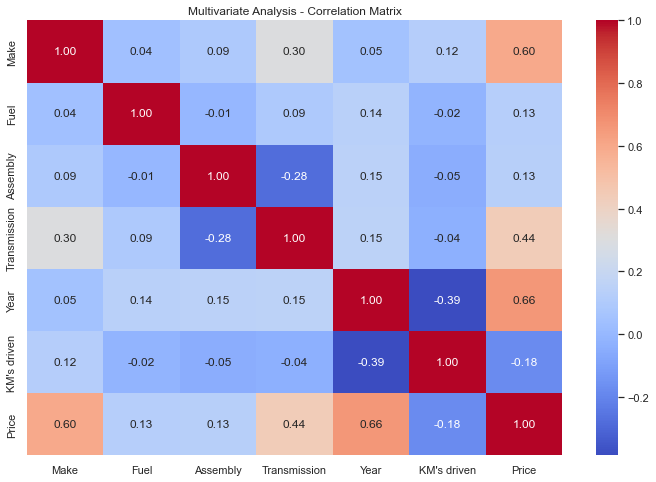

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multivariate Analysis - Correlation Matrix')
plt.show()

### 4.2 Outlier Removal

In [47]:
import pandas as pd
import numpy as np

def handle_outliers(df, columns):
    for column in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with lower and upper fence values
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df


print("Original DataFrame:")
print(df)





Original DataFrame:
      Make  Fuel  Assembly  Transmission  Year  KM's driven    Price
0      8.0   3.0       1.0           1.0  2022         8500  4200000
1      8.0   3.0       1.0           1.0  2022         2200  4100000
2      8.0   3.0       1.0           1.0  2021        17000  3950000
3      8.0   3.0       1.0           0.0  2022        15000  3785000
4      8.0   3.0       1.0           1.0  2022        27000  4075000
...    ...   ...       ...           ...   ...          ...      ...
8716   9.0   3.0       1.0           1.0  2020        54000  4500000
8717   9.0   3.0       1.0           0.0  2021        18500  4050000
8718   9.0   3.0       1.0           1.0  2022        12000  4700000
8719   9.0   3.0       1.0           1.0  2020        55000  3900000
8720   9.0   3.0       1.0           1.0  2021        31000  4345000

[8721 rows x 7 columns]


In [48]:
columns_to_handle_outliers = ['KM\'s driven']
df = handle_outliers(df, columns_to_handle_outliers)
df

,Make,Fuel,Assembly,Transmission,Year,KM's driven,Price
0,8.0,3.0,1.0,1.0,2022,8500.0,4200000
1,8.0,3.0,1.0,1.0,2022,2200.0,4100000
2,8.0,3.0,1.0,1.0,2021,17000.0,3950000
3,8.0,3.0,1.0,0.0,2022,15000.0,3785000
4,8.0,3.0,1.0,1.0,2022,27000.0,4075000
...,...,...,...,...,...,...,...
8716,9.0,3.0,1.0,1.0,2020,54000.0,4500000
8717,9.0,3.0,1.0,0.0,2021,18500.0,4050000
8718,9.0,3.0,1.0,1.0,2022,12000.0,4700000
8719,9.0,3.0,1.0,1.0,2020,55000.0,3900000


<AxesSubplot:xlabel="KM's driven">

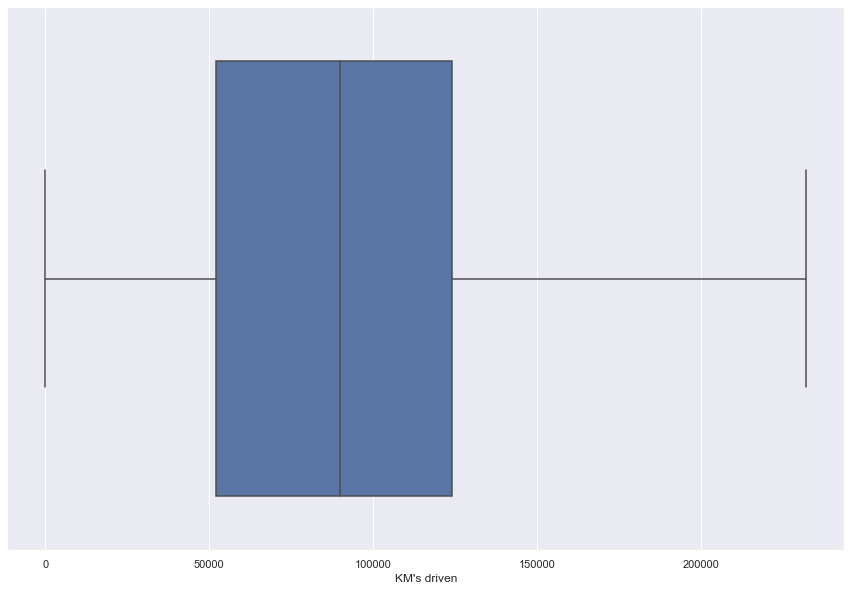

In [49]:
sns.boxplot(df['KM\'s driven'])
# Outlier removed

In [50]:
x=df.drop('Price',axis=1)
y=df['Price']
x

,Make,Fuel,Assembly,Transmission,Year,KM's driven
0,8.0,3.0,1.0,1.0,2022,8500.0
1,8.0,3.0,1.0,1.0,2022,2200.0
2,8.0,3.0,1.0,1.0,2021,17000.0
3,8.0,3.0,1.0,0.0,2022,15000.0
4,8.0,3.0,1.0,1.0,2022,27000.0
...,...,...,...,...,...,...
8716,9.0,3.0,1.0,1.0,2020,54000.0
8717,9.0,3.0,1.0,0.0,2021,18500.0
8718,9.0,3.0,1.0,1.0,2022,12000.0
8719,9.0,3.0,1.0,1.0,2020,55000.0


## 4.3 Scaling using Minmax scaler

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler

MinMaxScaler()

In [52]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.8       , 1.        , 1.        , 1.        , 0.94285714,
        0.03663378],
       [0.8       , 1.        , 1.        , 1.        , 0.94285714,
        0.00947849],
       [0.8       , 1.        , 1.        , 1.        , 0.91428571,
        0.07327187],
       ...,
       [0.9       , 1.        , 1.        , 1.        , 0.94285714,
        0.05172005],
       [0.9       , 1.        , 1.        , 1.        , 0.88571429,
        0.23706568],
       [0.9       , 1.        , 1.        , 1.        , 0.91428571,
        0.13361696]])

# 5. Feature Selection 

In [53]:
x_scaled

array([[0.8       , 1.        , 1.        , 1.        , 0.94285714,
        0.03663378],
       [0.8       , 1.        , 1.        , 1.        , 0.94285714,
        0.00947849],
       [0.8       , 1.        , 1.        , 1.        , 0.91428571,
        0.07327187],
       ...,
       [0.9       , 1.        , 1.        , 1.        , 0.94285714,
        0.05172005],
       [0.9       , 1.        , 1.        , 1.        , 0.88571429,
        0.23706568],
       [0.9       , 1.        , 1.        , 1.        , 0.91428571,
        0.13361696]])

In [54]:
y

0       4200000
1       4100000
2       3950000
3       3785000
4       4075000
         ...   
8716    4500000
8717    4050000
8718    4700000
8719    3900000
8720    4345000
Name: Price, Length: 8721, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=.8,random_state=50)

In [56]:
x_train

array([[0.3       , 1.        , 0.        , 1.        , 0.91428571,
        0.0344786 ],
       [0.3       , 1.        , 1.        , 1.        , 0.54285714,
        0.38361803],
       [0.9       , 1.        , 1.        , 0.        , 0.65714286,
        0.43534239],
       ...,
       [0.9       , 1.        , 0.        , 1.        , 0.94285714,
        0.45258385],
       [0.3       , 1.        , 1.        , 0.        , 0.8       ,
        0.43103203],
       [0.3       , 1.        , 1.        , 0.        , 0.74285714,
        0.49568748]])

In [57]:
y_train

5673    1780000
4566    1575000
8027    2575000
549     1025000
2680    3375000
         ...   
8262    2450000
6214    1480000
8324    4600000
6253    1400000
5600    1625000
Name: Price, Length: 6976, dtype: int64

# 6.Model Building

## 6.1 Linear Regression model

In [58]:
from sklearn.linear_model import LinearRegression


### 6.1.1 Model object creation

In [59]:
lr=LinearRegression()
lr

LinearRegression()

### 6.1.2 Model learning on training data

In [60]:
linear_model=lr.fit(x_train,y_train)
linear_model

LinearRegression()

In [61]:
linear_model.coef_

array([2410595.40032284,   42623.54481134,  145697.09554986,
        524157.15810476, 4055435.62711938,    9009.2516552 ])

### 6.1.3 Model Prediction on test data

In [62]:
y_pred=linear_model.predict(x_test)
y_pred

array([ 225799.65586854, 3819264.96798788, 1729910.24447093, ...,
       3799226.25195674, 2309860.10500643, 1385660.54379092])

### 6.1.4 Model Evaluation on Predicted data

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)

In [65]:
print('mean absolute error',':',mae)
print('mean sqaured error',':',mse)
print('r2score',':',r2score)

mean absolute error : 416934.8271186096
mean sqaured error : 278958318591.2759
r2score : 0.7938574583867438


### 6.1.5 Model save

In [77]:
import os
pickle.dump(linear_model, open('linear_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

## 6.2 Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

### 6.2.1 Model Object creation

In [68]:
dtr=DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

### 6.2.2 Model training on train data

In [70]:
decision_tree_model=dtr.fit(x_train,y_train)
decision_tree_model

DecisionTreeRegressor()

### 6.2.3 Model prediction on test data

In [71]:
y_pred_dtr=decision_tree_model.predict(x_test)
y_pred_dtr

array([ 680000., 4200000., 1050000., ..., 4500000., 2335000., 1022500.])

### 6.2.4 Model Evaluation on test data

In [72]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2score=r2_score(y_test,y_pred_dtr)

In [73]:
print('mean absolute error',':',mae)
print('mean sqaured error',':',mse)
print('r2score',':',r2score)

mean absolute error : 331028.87311365805
mean sqaured error : 220344134420.6154
r2score : 0.8371717318615242


### 6.2.5 Model Save

In [79]:
# import pickle
# import os
pickle.dump(decision_tree_model, open('decision_tree_model.pkl', 'wb'))

<IPython.core.display.Javascript object>

## 6.3 support Vector Machine  regressor

In [81]:
from sklearn.svm import SVR

### 6.3.1 Model Object Creation

In [82]:
svr=SVR()
svr

SVR()

### 6.3.2 Model training on training data

In [84]:
svr_model=svr.fit(x_train,y_train)
svr_model

SVR()

### 6.3.3 Model Prediction on test data

In [85]:
y_pred_svr=svr_model.predict(x_test)
y_pred_svr

array([1899493.41943459, 1900939.67372382, 1899757.55702629, ...,
       1900966.82425555, 1899851.17385586, 1899630.01274995])

### 6.3.4 Model Evaluation on test data

In [87]:
svr_mae=mean_absolute_error(y_test,y_pred_svr)
svr_mse=mean_squared_error(y_test,y_pred_svr)
svr_r2score=r2_score(y_test,y_pred_svr)

In [88]:
print('mean absolute error',':',svr_mae)
print('mean sqaured error',':',svr_mse)
print('r2score',':',svr_r2score)

mean absolute error : 944032.5967866933
mean sqaured error : 1390632464708.3994
r2score : -0.027639226435534958


### 6.3.5Model save

In [90]:
with open ('SVR_model.pkl','wb') as file:
    pickle.dump(svr_model,file)

<IPython.core.display.Javascript object>

In [ ]:
# 6.4 Model Building using ANN

# 7.Conclusion 